## Analysis of potential winners to plan advertising for the online store,Ice

# Table of contents   <a id='back'></a>
1.[Introduction](#intro)  
2.[Data Preprocessing](#data_prep)    
3.[Missing values.](#missing)   
5.[Duplicate values.](#duplicate)  
6.[Global Sales of games.](#global_sales)  
7.[Sales vs User/Professional review](#review)  
8.[User Profile for each region](#user_profile)  
9.[Test Hypothesis](#hypothesis)  
10.[Conclusion](#end)  


<a id='intro'></a>

# Introduction    


The online store Ice, sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.We have data going back to 2016. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

In [467]:
#importing all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import warnings

In [468]:
warnings.filterwarnings("ignore")
#open the dataset
try:
    games_data = pd.read_csv('games_data.csv')
except:
    print('Error opening file')
    

In [469]:
#general distribution of data
games_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,0,0,0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,2,2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,3,3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,6,6,6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,7,7,7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,8,8,8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [470]:
#basic details of the dataset
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16446 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        8137 non-null   float64
 14  user_score          10014 non-null  object 
 15  rating              9949 non-null   object 
dtypes: f

<a id='data_prep'></a>

# Data Preprocessing

In [471]:
#replacing column names to lowercase
games_data=games_data.rename(
columns={
         'Name':'name',
         'Platform':'platform',
         'Year_of_Release':'year_of_release',
         'Genre':'genre',
         'NA_sales':'na_sales',
         'EU_sales':'eu_sales',
         'JP_sales':'jp_sales',
         'Other_sales':'other_sales',
         'Critic_Score':'critic_score',
         'User_Score':'user_score',
         'Rating':'rating'    
}
)

In [472]:
#verifying the updated details
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16446 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        8137 non-null   float64
 14  user_score          10014 non-null  object 
 15  rating              9949 non-null   object 
dtypes: f

In [473]:
games_data.to_csv('games_data.csv')

<a id='missing'></a>

### Missing values

In [474]:
#get the missing values of the dataset
games_data.isna().sum()

Unnamed: 0               0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
Unnamed: 0.1.1.1         0
Unnamed: 0.1.1.1.1       0
name                     2
platform                 0
year_of_release        269
genre                    2
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
critic_score          8578
user_score            6701
rating                6766
dtype: int64

In [475]:
games_data.isna().sum()*100/len(games_data)

games_data.isna().mean() * 100

pd.DataFrame(round((games_data.isna().mean()*100),2)).style.background_gradient('coolwarm')

report = games_data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / games_data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
Unnamed: 0,0,0.00
Unnamed: 0.1,0,0.00
Unnamed: 0.1.1,0,0.00
Unnamed: 0.1.1.1,0,0.00


#### Missing values in 'year_of_release'

In [476]:
games_data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [477]:
games_data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

'year_of_release' has years from 1980 - 2016.games introduced in 2006-2011 has more records (+1000)
and those introduced in 1980-1990s are fewer in numbers(less than 50)

In [478]:
#percent of missing value in year of release
percent_missing=269/16715*100

In [479]:
percent_missing

1.609332934489979

In [480]:
#check the middle records with missing year of release
display(games_data[games_data['year_of_release'].isna()].iloc[50:60])

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3739,3739,3739,3739,3739,3739,NBA Street Vol. 2,GC,NaN,Sports,0.41,0.11,0.00,0.01,88.0,8.1,E
3883,3883,3883,3883,3883,3883,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.00,0.01,NaN,NaN,NaN
3997,3997,3997,3997,3997,3997,Wet,X360,NaN,Shooter,0.23,0.21,0.01,0.05,69.0,7.3,M
4127,4127,4127,4127,4127,4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
4132,4132,4132,4132,4132,4132,Karate,2600,NaN,Fighting,0.44,0.03,0.00,0.00,NaN,NaN,NaN
4205,4205,4205,4205,4205,4205,Tiger Woods PGA Tour 07,Wii,NaN,Sports,0.43,0.00,0.00,0.04,71.0,6.9,E
4220,4220,4220,4220,4220,4220,Circus Atari,2600,NaN,Action,0.43,0.03,0.00,0.00,NaN,NaN,NaN
4294,4294,4294,4294,4294,4294,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.00,0.02,89.0,8.9,M
4337,4337,4337,4337,4337,4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.00,0.00,NaN,NaN,NaN
4373,4373,4373,4373,4373,4373,Silent Hill: Homecoming,X360,NaN,Action,0.25,0.15,0.00,0.04,70.0,6.9,M


The sales of the games with missing year of release has very few sales in all the regions

In [481]:
#seperate dataset with missing years.
missing_year_df=games_data[games_data['year_of_release'].isna()]

In [482]:
missing_year_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,183,183,183,183,183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,377,377,377,377,377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,456,456,456,456,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,475,475,475,475,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,609,609,609,609,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,16373,16373,16373,16373,16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,16405,16405,16405,16405,16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,16448,16448,16448,16448,16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,16458,16458,16458,16458,16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [483]:
#checking year_of_release with sales
(games_data
 .groupby(['year_of_release'])
 .agg(na_sales_total = ('na_sales', 'sum'),
      eu_sales_total = ('eu_sales', 'sum'),
      jp_sales_total = ('jp_sales', 'sum'),
      other_sales_total = ('other_sales', 'sum')
     
     )
 .reset_index()
).head()

,year_of_release,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total
0,1980.0,10.59,0.67,0.00,0.12
1,1981.0,33.40,1.96,0.00,0.32
2,1982.0,26.92,1.65,0.00,0.31
3,1983.0,7.76,0.80,8.10,0.14
4,1984.0,33.28,2.10,14.27,0.70


In [484]:
missing_year_df['na_sales'].sum()

59.15

In [485]:
missing_year_df['eu_sales'].sum()

24.46

In [486]:
missing_year_df['jp_sales'].sum()

6.699999999999999

In [487]:
missing_year_df['other_sales'].sum()

8.610000000000003

No major issues with respect to Sales in different regions with missing year of release.
No relation or pattern with missing values in 'rating' and 'critic_score' ,'user_score' columns.
Also the percent of missing values in 'year of release' is just 1%..
Let's see if we can recover any year values using game name.



In [488]:
games_data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [489]:
#getting the names of the games
games_data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Based on the value_counts() on name, we proceed to recover some missing year by grouping on name.

In [490]:
#group data by name and fill missing value of year from the first of the group
games_data['year_of_release'].fillna(games_data.groupby('name')['year_of_release'].transform('first'), inplace=True)

In [491]:
games_data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [492]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        8137 non-null   float64
 14  user_score          10014 non-null  object 
 15  rating              9949 non-null   object 
dtypes: f

***Number of missing values in year_of_release got down further to 146 which is better now.***

`update`

In [493]:
games_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [494]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Missing values in 'critic_score'

In [495]:
#records with missing 'critic_score'
games_data[games_data['critic_score'].isna()]
          

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,10,10,10,10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [496]:
#records that are missing both critic_score and user_score
games_data[games_data['critic_score'].isna() & games_data['user_score'].isna()]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,10,10,10,10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [497]:
#Dataframe with records that are missing critic_score and user_score and also rating
missing_score_data=games_data[games_data['critic_score'].isna() & games_data['user_score'].isna() & games_data['rating'].isna()]

In [498]:
missing_score_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,10,10,10,10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [499]:
#seeing if any relation with sales 
missing_score_data[(missing_score_data['na_sales']==0.00) & (missing_score_data['eu_sales']==0.00) & (missing_score_data['jp_sales']==0.00) & (missing_score_data['other_sales']==0.00)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,16676,16676,16676,16676,16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,16709,16709,16709,16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [500]:
#seeing if any relation with sales 
missing_score_data[(missing_score_data['na_sales']==0.00) & (missing_score_data['eu_sales']==0.00) & (missing_score_data['jp_sales']==0.00)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,16676,16676,16676,16676,16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,16709,16709,16709,16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [501]:
#seeing if any relation with sales 
missing_score_data[(missing_score_data['na_sales']==0.00) & (missing_score_data['eu_sales']==0.00)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,215,215,215,215,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.0,4.87,0.00,NaN,NaN,NaN
340,340,340,340,340,340,Friend Collection,DS,2009.0,Misc,0.0,0.0,3.67,0.00,NaN,NaN,NaN
385,385,385,385,385,385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.0,3.44,0.00,NaN,NaN,NaN
428,428,428,428,428,428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.0,3.19,0.00,NaN,NaN,NaN
530,530,530,530,530,530,Dragon Quest V: Tenkuu no Hanayome,SNES,1992.0,Role-Playing,0.0,0.0,2.78,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,16707,16707,16707,16707,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.0,0.0,0.01,0.00,NaN,NaN,NaN
16709,16709,16709,16709,16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.00,0.00,NaN,NaN,NaN
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,0.01,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,0.01,0.00,NaN,NaN,NaN


In [502]:
#seeing if any relation with sales
missing_score_data[(missing_score_data['na_sales']==0.00) & (missing_score_data['eu_sales']==0.00) & (missing_score_data['other_sales']==0.00)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,215,215,215,215,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.0,4.87,0.0,NaN,NaN,NaN
340,340,340,340,340,340,Friend Collection,DS,2009.0,Misc,0.0,0.0,3.67,0.0,NaN,NaN,NaN
385,385,385,385,385,385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.0,3.44,0.0,NaN,NaN,NaN
428,428,428,428,428,428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.0,3.19,0.0,NaN,NaN,NaN
563,563,563,563,563,563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.0,0.0,2.68,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,16707,16707,16707,16707,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16709,16709,16709,16709,16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.00,0.0,NaN,NaN,NaN
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN


In [503]:
#seeing if any relation with sales
missing_score_data[(missing_score_data['jp_sales']==0.00) & (missing_score_data['other_sales']==0.00)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
521,521,521,521,521,521,Myst,PC,1994.0,Adventure,0.02,2.79,0.0,0.0,NaN,NaN,NaN
1207,1207,1207,1207,1207,1207,Command & Conquer: Tiberian Sun,PC,1999.0,Strategy,1.55,0.00,0.0,0.0,NaN,NaN,NaN
1461,1461,1461,1461,1461,1461,Command & Conquer: Red Alert 2,PC,2000.0,Strategy,1.32,0.02,0.0,0.0,NaN,NaN,NaN
3262,3262,3262,3262,3262,3262,NFL Quarterback Club 99,N64,1998.0,Sports,0.59,0.02,0.0,0.0,NaN,NaN,NaN
3316,3316,3316,3316,3316,3316,Madden NFL 2000,N64,1999.0,Sports,0.58,0.02,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694,16694,16694,16694,16694,16694,Carmageddon 64,N64,1999.0,Action,0.01,0.00,0.0,0.0,NaN,NaN,NaN
16708,16708,16708,16708,16708,16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.0,0.0,NaN,NaN,NaN
16709,16709,16709,16709,16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.0,0.0,NaN,NaN,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.0,0.0,NaN,NaN,NaN


In [504]:
#seeing if any relation with sales
missing_score_data[(missing_score_data['na_sales']==0.00) | (missing_score_data['eu_sales']==0.00) | (missing_score_data['jp_sales']==0.00) | (missing_score_data['other_sales']==0.00)]


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
89,89,89,89,89,89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
180,180,180,180,180,180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN
195,195,195,195,195,195,Microsoft Flight Simulator,PC,1996.0,Simulation,3.22,1.69,0.00,0.20,NaN,NaN,NaN
206,206,206,206,206,206,Warzone 2100,PS,1999.0,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN
215,215,215,215,215,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Based on different analysis above ,we see that nearly 6000 records have either one region with sales 0 in the dataset with missing values of critic_score,user_score and rating..

In [505]:
missing_score_data['na_sales'].sum()

1234.87

In [506]:
missing_score_data['eu_sales'].sum()

603.94

In [507]:
missing_score_data['jp_sales'].sum()

839.18

In [508]:
missing_score_data['other_sales'].sum()

149.11

***Sales in different regions are valid though in the lower range.No much impact on sales.***

In [509]:
games_data[games_data['critic_score'].isna()]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,10,10,10,10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Since we see a lot of missing values and no pattern could be derived from variables , we check if data from last five years have lesser missing values.

In [510]:
#checking to see if last 5 years data might be more clear.
games_data_last_five=games_data[games_data['year_of_release'] > 2011]

In [511]:
games_data_last_five

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,16,16,16,16,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,23,23,23,23,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
31,31,31,31,31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
33,33,33,33,33,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
34,34,34,34,34,34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,16703,16703,16703,16703,16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,16707,16707,16707,16707,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [512]:
games_data_last_five.isna().sum()

Unnamed: 0               0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
Unnamed: 0.1.1.1         0
Unnamed: 0.1.1.1.1       0
name                     0
platform                 0
year_of_release          0
genre                    0
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
critic_score          1577
user_score            1225
rating                1276
dtype: int64

Looking at the data in last 5 years , we see more than half of the dataset has missing values for the scores and rating.So going with the original dataset as of now..

Based on our analysis , missing values in 'critic_score','user_score' and 'rating ' are very high. Though these
values are not as significant as the sales in each region , they cannot be neglected either..

We cannot delete any of these missing value ('critic_score','user_score' and 'rating ')as their percentage is more..So let's see how to replace these missing value efficiently..
Working with 'user_score' before filling 'critic_score'

[Back to Contents](#back)

#### Missing values in 'user_score'

In [513]:
#lets see if any relation between sales and user_score
user_score_sales_pivot=games_data.pivot_table(index='user_score',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='mean').reset_index()

In [514]:
user_score_sales_pivot

,user_score,eu_sales,jp_sales,na_sales,other_sales
0,0,0.000000,0.000000,0.660000,0.060000
1,0.2,0.010000,0.000000,0.055000,0.010000
2,0.3,0.005000,0.000000,0.155000,0.010000
3,0.5,0.010000,0.000000,0.105000,0.005000
4,0.6,0.000000,0.000000,0.055000,0.005000
...,...,...,...,...,...
91,9.4,0.304545,0.208182,0.668182,0.044545
92,9.5,0.066667,0.045000,0.155000,0.020000
93,9.6,0.085000,0.055000,0.220000,0.005000
94,9.7,0.020000,0.000000,0.000000,0.010000


In [515]:
#define a method to get user score range
def user_score_range(score):
    try:
        score=pd.to_numeric(score)
    except:
        return ''
    if(0<=score<1):
        return '0-1'
    elif(1<=score<2):
        return '1-2'
    elif(2<=score<3):
        return '2-3'
    elif(3<=score<4):
        return '3-4'
    elif(4<=score<5):
        return '4-5'
    elif(5<=score<6):
        return '5-6'
    elif(6<=score<7):
        return '6-7'
    elif(7<=score<8):
        return '7-8'
    elif(8<=score<9):
        return '8-9'
    else:
        return '9-10'

In [516]:
user_score_sales_pivot['user_score_range']=user_score_sales_pivot['user_score'].apply(user_score_range)

In [517]:
user_score_sales_pivot

,user_score,eu_sales,jp_sales,na_sales,other_sales,user_score_range
0,0,0.000000,0.000000,0.660000,0.060000,0-1
1,0.2,0.010000,0.000000,0.055000,0.010000,0-1
2,0.3,0.005000,0.000000,0.155000,0.010000,0-1
3,0.5,0.010000,0.000000,0.105000,0.005000,0-1
4,0.6,0.000000,0.000000,0.055000,0.005000,0-1
...,...,...,...,...,...,...
91,9.4,0.304545,0.208182,0.668182,0.044545,9-10
92,9.5,0.066667,0.045000,0.155000,0.020000,9-10
93,9.6,0.085000,0.055000,0.220000,0.005000,9-10
94,9.7,0.020000,0.000000,0.000000,0.010000,9-10


In [518]:
user_score_sales_pivot=user_score_sales_pivot.groupby('user_score_range').agg(na_sales_total = ('na_sales','mean')).reset_index()

In [519]:
user_score_sales_pivot

,user_score_range,na_sales_total
0,,0.126052
1,0-1,0.170714
2,1-2,0.143767
3,2-3,0.435136
4,3-4,0.253076
5,4-5,0.262120
6,5-6,0.262196
7,6-7,0.326652
8,7-8,0.352434
9,8-9,0.475974


***We don't see a pattern between user score and the sales columns either.***

In [520]:
games_data[games_data['user_score']=='tbd'].head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,119,119,119,119,119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,301,301,301,301,301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,520,520,520,520,520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,645,645,645,645,645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,657,657,657,657,657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,718,718,718,718,718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,726,726,726,726,726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,821,821,821,821,821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,881,881,881,881,881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,1047,1047,1047,1047,1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


***Analysing with records having 'tbd' for 'user_score'.any impact on 'rating' and other columns..***

In [521]:
games_data[games_data['user_score']=='tbd'].tail(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16650,16650,16650,16650,16650,16650,Agatha Christie: Peril at End House,PC,2009.0,Adventure,0.00,0.01,0.0,0.0,NaN,tbd,T
16655,16655,16655,16655,16655,16655,Summer Athletics,PC,2008.0,Sports,0.00,0.01,0.0,0.0,NaN,tbd,NaN
16669,16669,16669,16669,16669,16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.0,0.0,72.0,tbd,T
16672,16672,16672,16672,16672,16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.0,0.0,NaN,tbd,M
16688,16688,16688,16688,16688,16688,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,0.01,0.00,0.0,0.0,NaN,tbd,T
16695,16695,16695,16695,16695,16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.0,67.0,tbd,E
16697,16697,16697,16697,16697,16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.0,53.0,tbd,E
16698,16698,16698,16698,16698,16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.0,48.0,tbd,E
16704,16704,16704,16704,16704,16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.0,NaN,tbd,E
16706,16706,16706,16706,16706,16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.0,0.0,NaN,tbd,T


In [522]:
games_data[games_data['user_score']=='tbd']['rating'].value_counts()

E       1575
T        380
E10+     370
M         42
EC         7
Name: rating, dtype: int64

In [523]:
games_data.groupby('rating')['user_score'].count()

rating
AO         1
E       3950
E10+    1413
EC         8
K-A        3
M       1560
RP         2
T       2941
Name: user_score, dtype: int64

In [524]:
games_data[games_data['user_score']=='tbd']['critic_score'].unique()

array([nan, 61., 71., 73., 55., 65., 63., 37., 64., 58., 76., 54., 59.,
       51., 80., 74., 66., 60., 44., 42., 69., 68., 53., 75., 49., 70.,
       43., 46., 90., 67., 77., 78., 62., 89., 81., 47., 56., 52., 34.,
       45., 72., 86., 57., 82., 26., 50., 84., 48., 36., 41., 33., 39.,
       79., 85., 83., 87., 40., 38., 88., 35., 32., 28., 27., 31., 30.,
       23.])

In [525]:
games_data[games_data['user_score']=='tbd']['jp_sales'].value_counts()

0.00    2342
0.01      16
0.02      11
0.03      11
0.05       7
0.06       6
0.04       5
0.09       3
0.16       2
0.08       2
0.12       2
0.18       2
0.11       2
0.25       2
0.13       2
0.10       1
0.15       1
0.86       1
0.14       1
0.20       1
0.26       1
0.47       1
0.17       1
0.31       1
Name: jp_sales, dtype: int64

In [526]:
games_data[games_data['user_score']=='tbd']['other_sales'].value_counts()

0.00    989
0.01    801
0.02    262
0.03    115
0.04     75
0.05     36
0.07     32
0.06     25
0.08     15
0.09     14
0.10     12
0.11      8
0.12      7
0.14      6
0.18      4
0.17      4
0.13      4
0.16      2
0.21      2
0.19      2
0.44      1
0.66      1
0.23      1
1.09      1
0.54      1
0.28      1
0.20      1
0.27      1
0.24      1
Name: other_sales, dtype: int64

In [527]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Looking at the records with 'user_score' value 'tbd' earlier,we didn't see much of a pattern with other columns.So , will consider it similar to missing values. 

In [528]:
#replacing 'tbd' with np.nan
games_data = games_data.replace('tbd', np.nan)

Following the same way as we filled missing 'year_of_release' ,we first replace missing values by getting the values from names ..and then the rest of missing values filled with ''

In [529]:
#group by name and get the first available value to fill missing value in years of same game
games_data['user_score'].fillna(games_data.groupby('name')['user_score'].transform('first'), inplace=True)

In [530]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        8137 non-null   float64
 14  user_score          8689 non-null   object 
 15  rating              9949 non-null   object 
dtypes: f

Though it is not super effective ,this method filled few of the missing values in 'user_score' column.

Filling missing values with a '' as filling with any other numbers including 0 might change the distribution of data.

In [531]:
games_data['user_score']=games_data['user_score'].fillna('') 

In [532]:
games_data['user_score'].unique()

array(['8', '', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '5.5', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.1', '4.9', '4.5', '9.3', '6.2', '4.2',
       '6', '3.7', '5.8', '5.6', '4.4', '4.6', '5.9', '3.9', '3.5', '3.1',
       '2.9', '5.2', '3.3', '2.2', '4.7', '5.1', '2.5', '1.9', '3', '3.6',
       '2.7', '2', '9.5', '2.1', '9.7', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.3', '1.4', '1.5', '0.7',
       '1.2', '2.3', '0.5', '0.2', '0.6', '0.9', '1'], dtype=object)

#### Working with missing critc_score

In [533]:
games_data.tail(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,16705,16705,16705,16705,16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,16706,16706,16706,16706,16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,7.3,T
16707,16707,16707,16707,16707,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,,NaN
16708,16708,16708,16708,16708,16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,,NaN
16709,16709,16709,16709,16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,,NaN
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,,NaN
16714,16714,16714,16714,16714,16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,,NaN


In [534]:
games_data.iloc[150:160]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
150,150,150,150,150,150,LittleBigPlanet,PS3,2008.0,Platform,2.80,1.98,0.17,0.87,95.0,6.8,E
151,151,151,151,151,151,Resident Evil 2,PS,1998.0,Action,1.88,1.47,2.02,0.45,89.0,9.2,M
152,152,152,152,152,152,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,0.63,0.67,4.35,0.15,87.0,8.8,E10+
153,153,153,153,153,153,Tekken 2,PS,1996.0,Fighting,2.26,1.89,1.36,0.23,89.0,8.9,T
154,154,154,154,154,154,Destiny,PS4,2014.0,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T
155,155,155,155,155,155,LEGO Star Wars: The Complete Saga,Wii,2007.0,Action,3.57,1.55,0.00,0.51,80.0,8.9,E10+
156,156,156,156,156,156,Cooking Mama,DS,2006.0,Simulation,3.07,1.91,0.07,0.57,67.0,7.2,E
157,157,157,157,157,157,Tetris,NES,1988.0,Puzzle,2.97,0.69,1.81,0.11,NaN,,NaN
158,158,158,158,158,158,Super Smash Bros.,N64,1999.0,Fighting,2.95,0.60,1.97,0.04,NaN,,NaN
159,159,159,159,159,159,Assassin's Creed II,PS3,2009.0,Action,2.54,1.93,0.21,0.86,91.0,8.6,M


In [535]:
#lets see if any relation between sales and critic_score
critic_score_sales_pivot=games_data.pivot_table(index='critic_score',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='mean').reset_index()

In [536]:
critic_score_sales_pivot

,critic_score,eu_sales,jp_sales,na_sales,other_sales
0,13.0,0.010000,0.000000,0.020000,0.010000
1,17.0,0.030000,0.000000,0.060000,0.010000
2,19.0,0.020000,0.000000,0.075000,0.008333
3,20.0,0.150000,0.000000,0.416667,0.056667
4,21.0,0.030000,0.000000,0.080000,0.010000
...,...,...,...,...,...
77,94.0,0.986486,0.245676,1.967568,0.361081
78,95.0,1.625000,0.280625,3.493125,1.185000
79,96.0,1.163333,0.395000,2.167778,0.306111
80,97.0,3.295455,0.371818,4.607273,1.010000


In [537]:
games_data[games_data['critic_score'].isna()]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,,NaN
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,,NaN
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,,NaN
10,10,10,10,10,10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,,NaN
16711,16711,16711,16711,16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,,NaN
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,,NaN
16713,16713,16713,16713,16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,,NaN


Since the missing percentage is significantly more in 'critic value', we are not deleting it and also not
filling with other values as it might affect the original distribution of data.We first try to fill missing values by grouping name as we did for 'year_of_released' and 'user_score' and then with '' to ease our analysis further.

In [538]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        8137 non-null   float64
 14  user_score          16715 non-null  object 
 15  rating              9949 non-null   object 
dtypes: f

In [539]:
#group by name and get the first available value to fill missing value in critic_score of same game
games_data['critic_score'].fillna(games_data.groupby('name')['critic_score'].transform('first'), inplace=True)

In [540]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        9098 non-null   float64
 14  user_score          16715 non-null  object 
 15  rating              9949 non-null   object 
dtypes: f

In [541]:
#filling missing values in critic score with ''
games_data['critic_score']=games_data['critic_score'].fillna('')

In [542]:
games_data['critic_score'].unique()

array([76.0, '', 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0,
       77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0,
       73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 42.0, 67.0,
       81.0, 66.0, 56.0, 43.0, 79.0, 70.0, 59.0, 64.0, 75.0, 60.0, 63.0,
       69.0, 50.0, 25.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0, 65.0, 54.0,
       20.0, 53.0, 37.0, 52.0, 38.0, 33.0, 30.0, 32.0, 45.0, 51.0, 40.0,
       46.0, 39.0, 34.0, 35.0, 41.0, 36.0, 28.0, 31.0, 27.0, 26.0, 19.0,
       23.0, 24.0, 21.0, 17.0, 22.0, 13.0], dtype=object)

In [543]:
games_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,0,0,0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,,,NaN
2,2,2,2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,3,3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,,,NaN
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,,,NaN
6,6,6,6,6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,7,7,7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,8,8,8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,,,NaN


[Back to Contents](#back)

#### Working with missing 'rating'

In [544]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

As mentioned for 'critic_score' and 'user_score' ,we go with filling missing values of 'rating' with '' as the proportion of missing values are very high to be deleted .Also we cannot find a pattern to replace missing values.So we stick to filling with values from same games and then filling with ''.

In [545]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        16715 non-null  object 
 14  user_score          16715 non-null  object 
 15  rating              9949 non-null   object 
dtypes: f

In [546]:
##group by name and get the first available value to fill missing value in rating of same game
games_data['rating'].fillna(games_data.groupby('name')['rating'].transform('first'), inplace=True)

In [547]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        16715 non-null  object 
 14  user_score          16715 non-null  object 
 15  rating              10386 non-null  object 
dtypes: f

In [548]:
#filling missing values in rating with ''
games_data['rating']=games_data['rating'].fillna('')

In [549]:
games_data['rating'].unique()

array(['E', '', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [550]:
games_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,0,0,0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,,,
2,2,2,2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,3,3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,,,
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,,,
6,6,6,6,6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,7,7,7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,8,8,8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,,,


In [551]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        16715 non-null  object 
 14  user_score          16715 non-null  object 
 15  rating              16715 non-null  object 
dtypes: f

We just neglect missing values in 'name' and 'genre' as they are very negligible(2) in count.

[Back to Contents](#back)

#### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [552]:
games_data['all_region_sales']=games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']


In [553]:

games_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,0,0,0,0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,1,1,1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,,,,40.24
2,2,2,2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,3,3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,4,4,4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,,,,31.38
5,5,5,5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,,,,30.26
6,6,6,6,6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,7,7,7,7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,8,8,8,8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,9,9,9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,,,,28.31


In [554]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16715 non-null  int64  
 1   Unnamed: 0.1        16715 non-null  int64  
 2   Unnamed: 0.1.1      16715 non-null  int64  
 3   Unnamed: 0.1.1.1    16715 non-null  int64  
 4   Unnamed: 0.1.1.1.1  16715 non-null  int64  
 5   name                16713 non-null  object 
 6   platform            16715 non-null  object 
 7   year_of_release     16569 non-null  float64
 8   genre               16713 non-null  object 
 9   na_sales            16715 non-null  float64
 10  eu_sales            16715 non-null  float64
 11  jp_sales            16715 non-null  float64
 12  other_sales         16715 non-null  float64
 13  critic_score        16715 non-null  object 
 14  user_score          16715 non-null  object 
 15  rating              16715 non-null  object 
 16  all_

<a id='duplicates'></a>

<a id='duplicate'></a>

# Checking for duplicates

In [555]:
games_data.duplicated().sum()

0

Our data is free from duplicates.

Final checking for any inappropriate data in the columns.

In [556]:
games_data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [557]:
games_data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [558]:
games_data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [559]:
games_data['na_sales'].value_counts()

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: na_sales, Length: 402, dtype: int64

In [560]:
games_data['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [561]:
games_data['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [562]:
games_data['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [563]:
games_data['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Checking the sales values in each region using describe() shows that most of the values in the dataset are less than 0.5 ,where as the max value being around 40 which means there are outliners ..Will analyze further regarding this.

[Back to Contents](#back)

### Analyze the data

#### Analyze games released every year

In [564]:
games_data['year_of_release']=games_data['year_of_release'].astype('Int64')

In [565]:
#games released every year
#games_released=(games_data.groupby('year_of_release').agg(total_games_released = ('name','count'))).reset_index().tail(20)
games_released=(games_data.groupby('year_of_release').agg(total_games_released = ('name','count'))).reset_index()



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

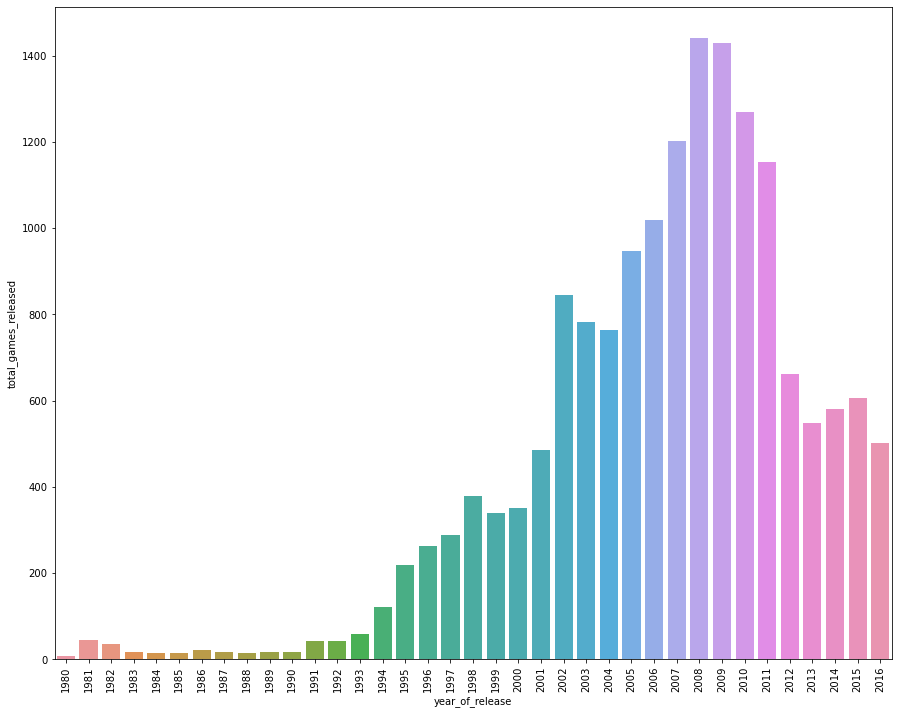

In [566]:
plt.subplots(figsize=(15,12))
sns.barplot(x=games_released['year_of_release'], y=games_released['total_games_released'])
plt.xticks(rotation=90)



Looking at the number of games released each year , we see that maximum games were released around the period 2008-2009.And then we see that the games released were reduced by half in the coming years .Since we are dealing with 2017 ,and the games released from 2012 -2016 shows similar trend ,it would be appropriate to use data from these years for our analysis.

#### Platform with greatest total sales

In [567]:
#platform with greatest total sales
games_data_sales=games_data.groupby('platform').agg(total_sales = ('all_region_sales','sum')).sort_values('total_sales',ascending=False).reset_index().head(20)

In [568]:
games_data_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


PS2 platform has the highest total sales considering 1997-2016 while WiiU has the lowest sales in the given time period.

In [569]:
top_ten_platform=games_data_sales.iloc[0:10,0]

In [570]:
top_ten_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     GBA
7     PS4
8     PSP
9      PC
Name: platform, dtype: object

In [571]:
#get the total_sales for each platform grouped for each year 
games_data_year_sales=(games_data.groupby(['platform','year_of_release']).agg(total_sales = ('all_region_sales','sum'))).reset_index()

In [572]:
#distribution of yearly sales of each platform
games_data_year_sales

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
240,XB,2008,0.18
241,XOne,2013,18.96
242,XOne,2014,54.07
243,XOne,2015,60.14


In [573]:
#function to plot 10 platforms with highes sales value ( distribution)
#top_ten_platform - gives the top 10 platform with highest 'sales'
#games_data_year_sales - gives the distribution of yearly sales of each platform in top_ten_platform
def plot_sales_year(platform_list): 
    try:
        for platform in platform_list:
            games_data_year_sales[games_data_year_sales['platform'] == platform].plot.bar(x='year_of_release',y='total_sales',title=platform)
    except:
        print('Error in plotting')

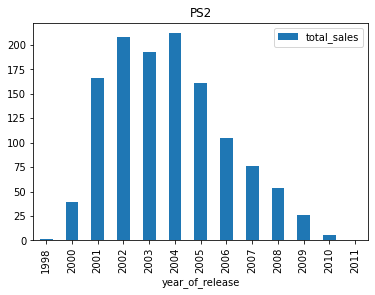

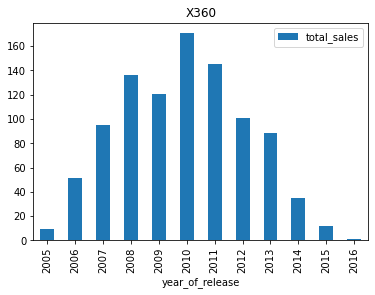

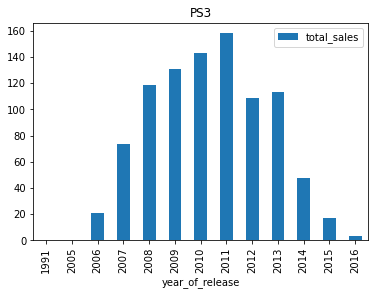

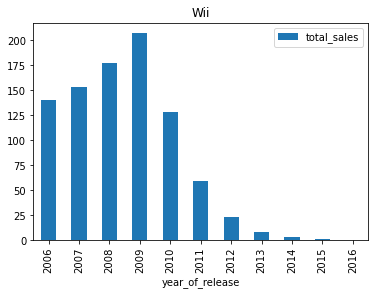

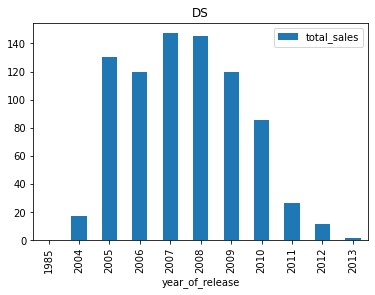

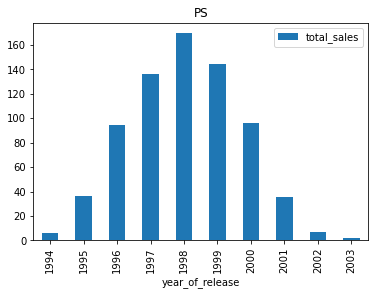

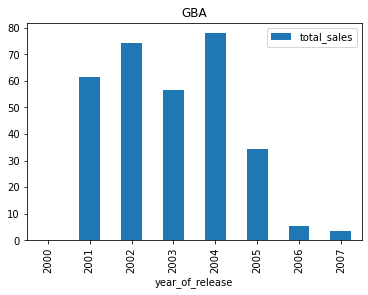

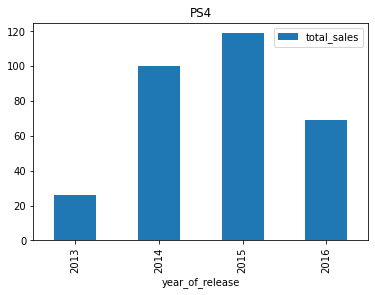

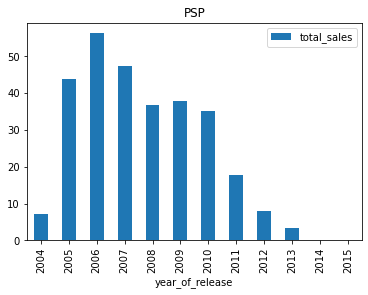

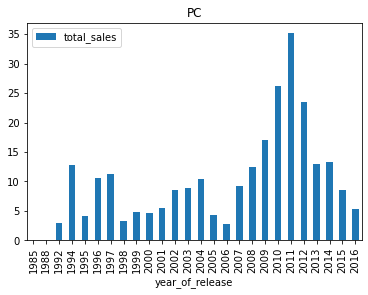

In [574]:
plot_sales_year(top_ten_platform)

Based on the plots ,we see many unwanted data dated back to more than 10years.We will go with last 6yrs data for our analysis as this might give us performance of the games for atleast 4 years prior to current release. 

***Creating dataset 'games_data_recent' with all datas  from games_data after 2013.  
This will be used for all  our further analysis.***

In [575]:
#create dataset for data after 2013
games_data_recent=games_data[games_data['year_of_release'] > 2013]

In [576]:
games_data_recent.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
31,31,31,31,31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,,,,14.63
42,42,42,42,42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,47,47,47,47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,,,,11.68
77,77,77,77,77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,87,87,87,87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,,,,7.98
92,92,92,92,92,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,94,94,94,94,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5,E,7.60
96,96,96,96,96,96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,,,,7.55
99,99,99,99,99,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,,,,7.39
105,105,105,105,105,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [577]:
games_data_recent['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

[Back to Contents](#back)

#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [578]:
#platform with maximum total sales
games_data_recent_sales=games_data_recent.groupby('platform').agg(total_sales = ('all_region_sales','sum'),average_sales = ('all_region_sales','mean')).sort_values('total_sales',ascending=False).reset_index().head(20)

In [579]:
games_data_recent_sales

,platform,total_sales,average_sales
0,PS4,288.15,0.766356
1,XOne,140.36,0.615614
2,3DS,86.68,0.408868
3,PS3,68.18,0.311324
4,X360,48.22,0.434414
5,WiiU,42.98,0.588767
6,PC,27.05,0.179139
7,PSV,22.40,0.075932
8,Wii,5.07,0.460909
9,PSP,0.36,0.027692


In [580]:
#storing top 10 platform(highest sales)in seperate variable
top_ten_recent_platform=games_data_recent_sales.iloc[0:10,0]

In [581]:
# platform with total sales yearly
games_data_recent_year_sales=(games_data_recent.groupby(['platform','year_of_release']).agg(total_sales = ('all_region_sales','sum'),average_sales = ('all_region_sales','mean'))).reset_index()

In [582]:
games_data_recent_year_sales

,platform,year_of_release,total_sales,average_sales
0,3DS,2014,43.76,0.547000
1,3DS,2015,27.78,0.323023
2,3DS,2016,15.14,0.329130
3,PC,2014,13.28,0.282553
4,PC,2015,8.52,0.170400
5,PC,2016,5.25,0.097222
6,PS3,2014,47.76,0.442222
7,PS3,2015,16.82,0.230411
8,PS3,2016,3.60,0.094737
9,PS4,2014,100.00,1.333333


In [583]:
#function to get plot 10 platforms with highes sales value and creating a distribution
def plot_sales_recent_year(platform_list):
    try:
        for platform in platform_list:
            games_data_recent_year_sales[games_data_recent_year_sales['platform'] == platform].plot.bar(x='year_of_release',y='total_sales',title=platform)
    except:
        print('Error in plotting')

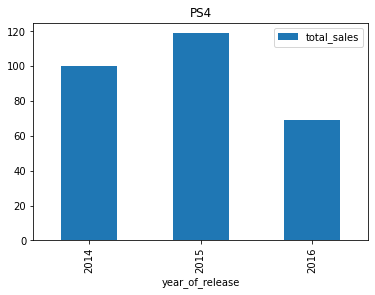

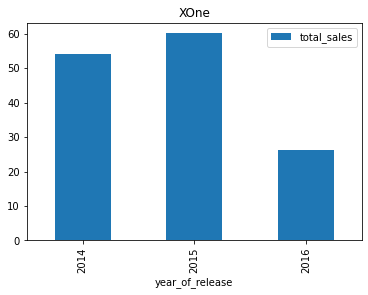

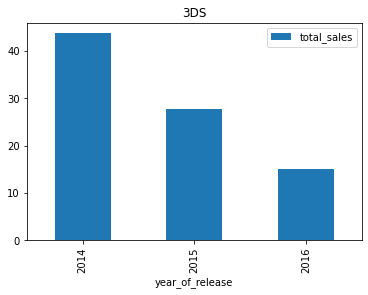

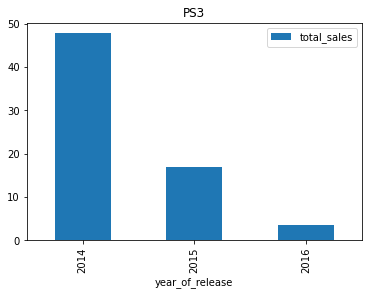

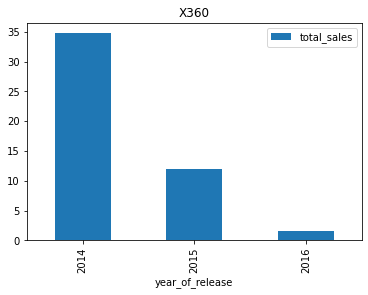

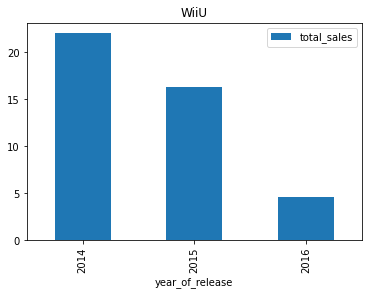

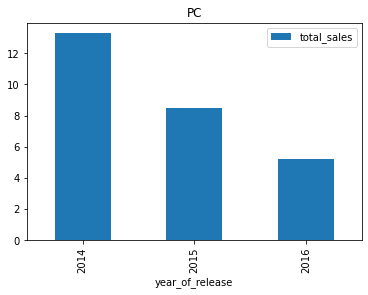

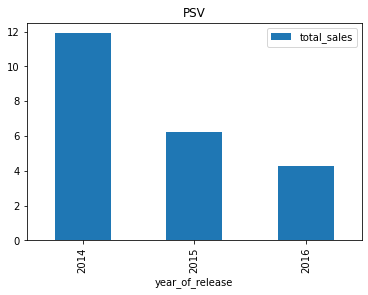

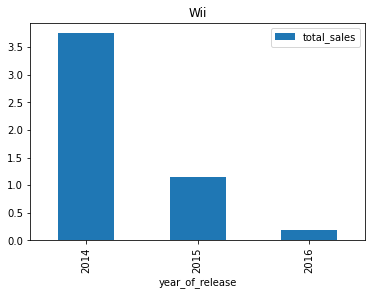

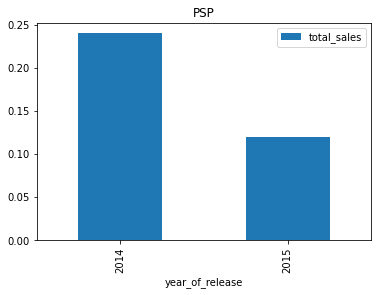

In [584]:
plot_sales_recent_year(top_ten_recent_platform)

***Conclusion***  
PS3 which was leading in sales in 2011 started declining gradually and is at the least in 2016.Similar trends are shown by x360,PC,Wii...On an average it shows that once poopular old ones take around 5-6 yrs to go down to 0.

[Back to Contents](#back)

Lets see the trend of platforms that are at the top for the past 2 years(2015-2016).

In [585]:
#dataset with the last 2 years data
games_data_current=games_data[games_data['year_of_release'] > 2014]

In [586]:
games_data_current

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
31,31,31,31,31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,,,,14.63
77,77,77,77,77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,87,87,87,87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,,,,7.98
94,94,94,94,94,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5,E,7.60
99,99,99,99,99,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,,,,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,16699,16699,16699,16699,16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,,,,0.01
16703,16703,16703,16703,16703,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,,,,0.01
16710,16710,16710,16710,16710,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,,,,0.01
16712,16712,16712,16712,16712,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,,,,0.01


In [587]:
#platform with  total sales
games_data_current_sales=games_data_current.groupby('platform').agg(total_sales = ('all_region_sales','sum'),average_sales=('all_region_sales','mean')).sort_values('total_sales',ascending=False).reset_index().head(20)

In [588]:
games_data_current_sales

,platform,total_sales,average_sales
0,PS4,188.15,0.625083
1,XOne,86.29,0.516707
2,3DS,42.92,0.325152
3,WiiU,20.95,0.498810
4,PS3,20.42,0.183964
5,PC,13.77,0.132404
6,X360,13.48,0.280833
7,PSV,10.50,0.053846
8,Wii,1.32,0.264000
9,PSP,0.12,0.040000


In [589]:
#getting top 10 platforms in the past 2 years(highest total sales)
top_ten_current_platform=games_data_current_sales.iloc[0:10,0]

In [590]:
top_ten_current_platform

0     PS4
1    XOne
2     3DS
3    WiiU
4     PS3
5      PC
6    X360
7     PSV
8     Wii
9     PSP
Name: platform, dtype: object

In [591]:
#platform with total sales yearly
games_data_current_year_sales=(games_data_current.groupby(['platform','year_of_release']).agg(total_sales = ('all_region_sales','sum'))).reset_index()

In [592]:
#platform with sales grouped yearly
games_data_current_year_sales

,platform,year_of_release,total_sales
0,3DS,2015,27.78
1,3DS,2016,15.14
2,PC,2015,8.52
3,PC,2016,5.25
4,PS3,2015,16.82
5,PS3,2016,3.60
6,PS4,2015,118.90
7,PS4,2016,69.25
8,PSP,2015,0.12
9,PSV,2015,6.25


In [593]:
#function to get plot 10 platforms with highes sales value and creating a distribution(current year)
def plot_sales_current_year(platform_list):
    try:
        for platform in platform_list:
            games_data_current_year_sales[games_data_current_year_sales['platform'] == platform].plot.bar(x='year_of_release',y='total_sales',title=platform)
    except:
        print('Error in plotting')

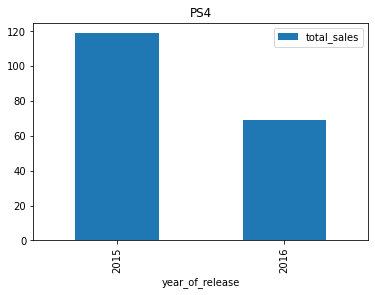

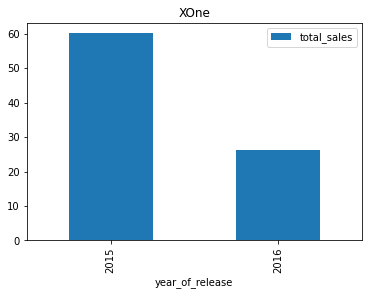

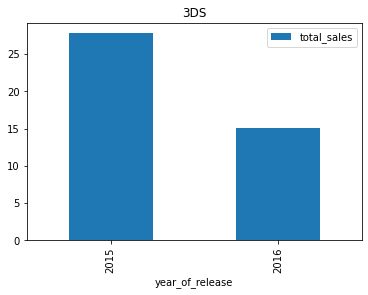

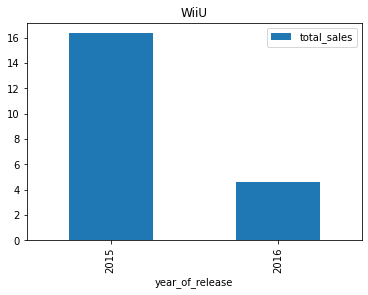

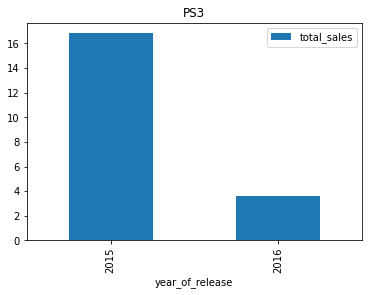

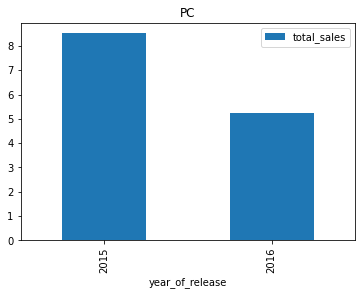

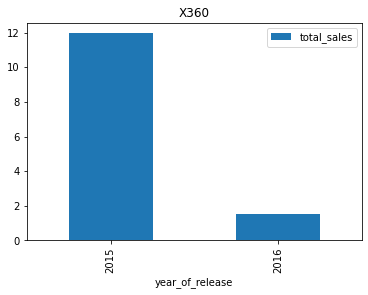

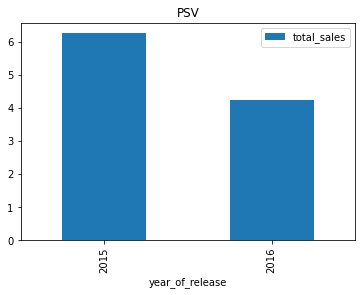

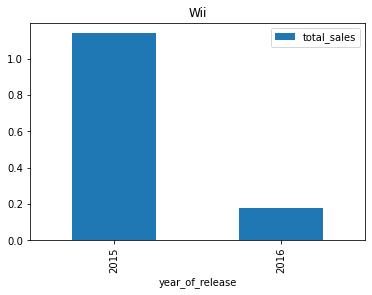

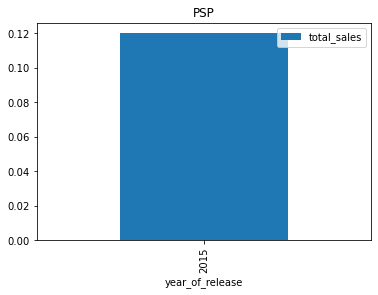

In [594]:
plot_sales_current_year(top_ten_current_platform)

Based on our 'plot_sales_current_year' for the last 2 years , we see that PS4 is leading in sales followed by XOne and 3DS.We also see that most of the platform have been around for years and are in kind of declining state.It's hard to state how long it takes for new games to gain popular with the data available.

***Intermediate Conclusions***  

Comparing the two plots:'plot_sales_recent_year' and 'plot_sales_current_year'  

Leading platform : PS4,Xone,3DS  
Shrinking platform :PS3,X360,Wii  

  PS4 seems to be a profitable platform.Though its is in declining phase , it has been growing for the past 4-5 years consistently . So there is a possibility that this declining phase is a temporary one.
XOne is also showing a similar trend. 
WiiU has shown consistency with lesser deviation for the last 4 years .So though it is showing decrease in sales , it has potential to improve in sales


[Back to Contents](#back)

<a id='global_sales'></a>

# Global sales of games

In [595]:
global_sales_temp=games_data_recent.pivot_table(index=['name','platform'],values=['na_sales','eu_sales','jp_sales','other_sales']).reset_index()

In [596]:
global_sales_temp

,name,platform,eu_sales,jp_sales,na_sales,other_sales
0,Beyblade Burst,3DS,0.00,0.03,0.00,0.00
1,Fire Emblem Fates,3DS,0.23,0.52,0.81,0.11
2,Haikyu!! Cross Team Match!,3DS,0.00,0.04,0.00,0.00
3,12-Sai. Honto no Kimochi,3DS,0.00,0.07,0.00,0.00
4,12-Sai. Koisuru Diary,3DS,0.00,0.05,0.00,0.00
...,...,...,...,...,...,...
1684,ZombiU,XOne,0.01,0.00,0.00,0.00
1685,Zombie Army Trilogy,PS4,0.12,0.00,0.05,0.03
1686,Zombie Army Trilogy,XOne,0.05,0.00,0.05,0.01
1687,htoL#NiQ: The Firefly Diary,PSV,0.00,0.01,0.00,0.00


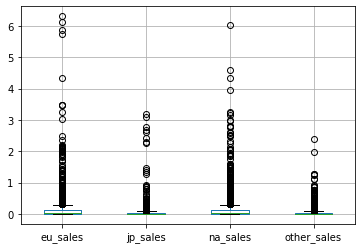

In [597]:
global_sales_temp.boxplot()
plt.show()

The above boxplot shows there are many outliers in this table. na_sales shows some valid data in the plot.We don't see any significant difference in sales in any other regions with this plot.

`update`

In [598]:
games_data_recent_year_sales

,platform,year_of_release,total_sales,average_sales
0,3DS,2014,43.76,0.547000
1,3DS,2015,27.78,0.323023
2,3DS,2016,15.14,0.329130
3,PC,2014,13.28,0.282553
4,PC,2015,8.52,0.170400
5,PC,2016,5.25,0.097222
6,PS3,2014,47.76,0.442222
7,PS3,2015,16.82,0.230411
8,PS3,2016,3.60,0.094737
9,PS4,2014,100.00,1.333333


<AxesSubplot:xlabel='platform', ylabel='average_sales'>

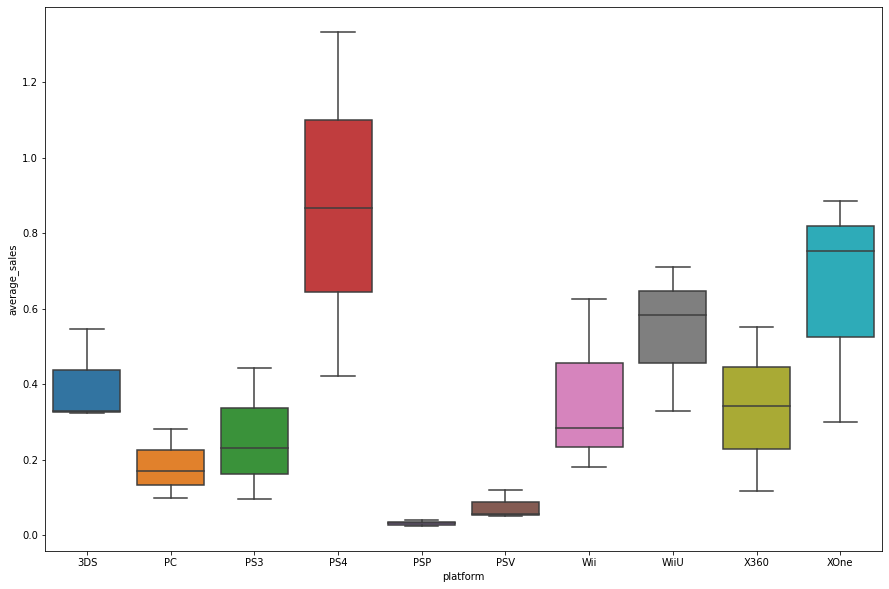

In [599]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='platform', y='average_sales', data=games_data_recent_year_sales)

PS4,XOne and 3DS have the highest average sale for the last 3 years .

In [600]:
#getting the dataset with platform and total sales
games_data_recent_sales

,platform,total_sales,average_sales
0,PS4,288.15,0.766356
1,XOne,140.36,0.615614
2,3DS,86.68,0.408868
3,PS3,68.18,0.311324
4,X360,48.22,0.434414
5,WiiU,42.98,0.588767
6,PC,27.05,0.179139
7,PSV,22.40,0.075932
8,Wii,5.07,0.460909
9,PSP,0.36,0.027692


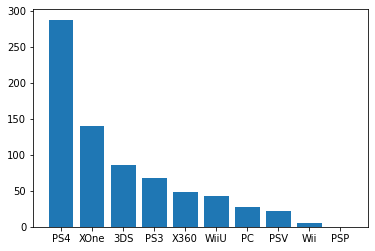

In [601]:
#plotting the total_Sales for each platform using barchart
plt.bar(games_data_recent_sales['platform'],games_data_recent_sales['total_sales'])
plt.show()

In [602]:
# average sales on various platforms
games_data_recent_sales

,platform,total_sales,average_sales
0,PS4,288.15,0.766356
1,XOne,140.36,0.615614
2,3DS,86.68,0.408868
3,PS3,68.18,0.311324
4,X360,48.22,0.434414
5,WiiU,42.98,0.588767
6,PC,27.05,0.179139
7,PSV,22.40,0.075932
8,Wii,5.07,0.460909
9,PSP,0.36,0.027692


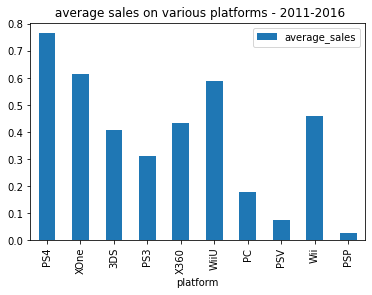

In [603]:
# plotting average sales on various platforms
games_data_recent_sales.plot.bar(x='platform',y='average_sales',title=' average sales on various platforms - 2011-2016')
plt.show()

***Findings from average sales on various platforms***  
PS4 has the highest average sales compared to all other platform for the years from 2011-2016.We even studied it
to have better possibility for 2017 based on our previous analysis (current 2 years).  
PS2 which was popular in 2000s is totally out of picture from 2011..  
PS4 along with X360,PS3,Xone are the ones with highest ranking for average sales in the given time period.  
PSP,PS2 and PSV have very low range in average sales for the given period.



[Back to Contents](#back)

<a id='review'></a>

# Correlation between sales and user and professional review
Lets take 'PS4' into consideration to perform this analysis as it is one of the topmost pick from my analysis.

In [604]:
games_data_ps4_score=games_data_recent.loc[games_data_recent['platform']=='PS4',['user_score','critic_score','all_region_sales']].reset_index()


In [605]:
games_data_ps4_score=games_data_ps4_score[(games_data_ps4_score['user_score'] !='') &  (games_data_ps4_score['critic_score'] !='')]

In [606]:
games_data_ps4_score['user_score']=pd.to_numeric(games_data_ps4_score['user_score'])

In [607]:
games_data_ps4_score

,index,user_score,critic_score,all_region_sales
1,42,8.3,97.0,12.62
2,77,4.3,82.0,8.58
4,92,5.7,83.0,7.66
5,94,5.0,85.0,7.60
6,105,6.5,87.0,7.17
...,...,...,...,...
368,16486,2.3,42.0,0.01
370,16499,6.8,70.0,0.01
371,16500,7.5,69.0,0.01
373,16526,7.9,61.0,0.01


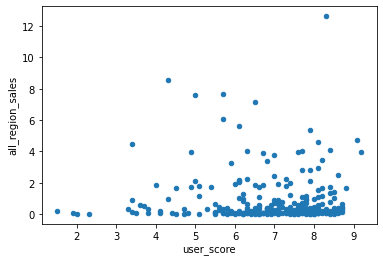

In [608]:
games_data_ps4_score.plot(x='user_score', y='all_region_sales', kind='scatter') 
plt.show()

In [609]:
print(games_data_ps4_score['user_score'].corr(games_data_ps4_score['all_region_sales']))

-0.03256778616391674


A negative Pearson correlation coefficient(-0.024) indicates that 'user_score' negatively impacts the total sales.We see in the plot - though we have more concentration around user score 7- 9 , sales is very low.

In [610]:
games_data_ps4_score['critic_score']=pd.to_numeric(games_data_ps4_score['critic_score'])

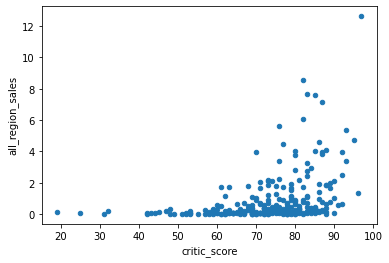

In [611]:
games_data_ps4_score.plot(x='critic_score', y='all_region_sales', kind='scatter')
plt.show()

In [612]:
print(games_data_ps4_score['critic_score'].corr(games_data_ps4_score['all_region_sales']))

0.386976205270682


***Conclusion***  
Pearson correlation coefficient for 'critic_score' is around 0.39 which means it has a medium correlation with
the total sales.We do  see some increase  in sales value along with higher critic_score though not stronger.  


[Back to Contents](#back)

In [613]:
games_data_recent['name'].value_counts()

The LEGO Movie Videogame                       8
LEGO The Hobbit                                8
Lego Batman 3: Beyond Gotham                   8
FIFA 15                                        8
LEGO Jurassic World                            8
                                              ..
The Legend of Heroes VII: The Trail of Blue    1
Doraemon: Nobita no Uchuu Eiyuuki              1
Culdcept Revolt                                1
Devil's Third                                  1
Haitaka no Psychedelica                        1
Name: name, Length: 956, dtype: int64

In [614]:
games_data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [615]:
games_data_recent.shape

(1689, 17)

#### General distribution of genre

In [616]:
games_genre = games_data_recent.pivot_table(index='genre',values='name',aggfunc='count').reset_index()

In [617]:
games_genre=games_genre.rename(columns={
         'genre':'genre',
         'name':'number of games'})

In [618]:
games_genre

,genre,number of games
0,Action,619
1,Adventure,185
2,Fighting,60
3,Misc,113
4,Platform,38
5,Puzzle,14
6,Racing,69
7,Role-Playing,221
8,Shooter,128
9,Simulation,44


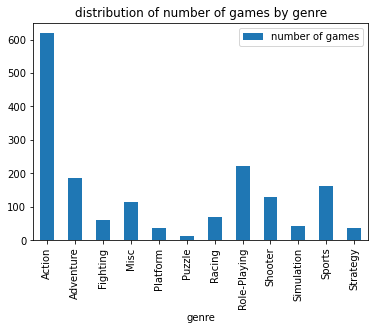

In [619]:
games_genre.plot.bar(x='genre',y='number of games',title='distribution of number of games by genre')
plt.show()

Number of games released in Action genre is much more compared to any other genre .  
Role-playing,Adventure,Sports and miscellanious have  games but way lesser than Action genre.

In [620]:
# dataset with genre and sales
games_data_recent_genre=games_data_recent.groupby('genre',sort=True).agg(total_sales=('all_region_sales','sum'),average_sales=('all_region_sales','median')).reset_index()

In [621]:
games_data_recent_genre=games_data_recent_genre.sort_values(by=['total_sales','average_sales'],ascending=False)

In [622]:
games_data_recent_genre

,genre,total_sales,average_sales
0,Action,199.36,0.090
8,Shooter,170.94,0.515
10,Sports,109.48,0.180
7,Role-Playing,101.44,0.110
3,Misc,37.55,0.090
2,Fighting,28.22,0.125
6,Racing,27.52,0.090
4,Platform,18.09,0.140
1,Adventure,17.55,0.030
9,Simulation,13.13,0.100


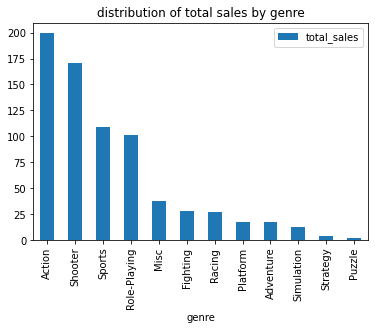

In [623]:
games_data_recent_genre.plot.bar(x='genre',y='total_sales',title='distribution of total sales by genre')
plt.show()

Based on the above bar chart , 'Action' genre is more profitable compared to any other genre.'Shooter' comes next followed by 'Role-playing' and 'Sports' being closer in terms of sales .
'Puzzle' and 'Strategy'  are the two genres that are doing very bad.

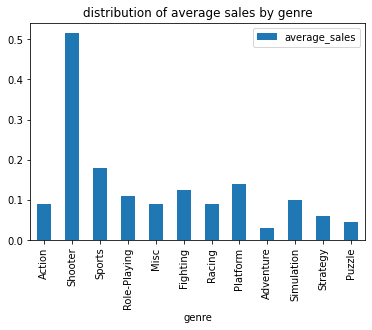

In [624]:
games_data_recent_genre.plot.bar(x='genre',y='average_sales',title='distribution of average sales by genre')
plt.show()

'Shooter' has a higher average sales compared to 'Action'. 'sports' follows it in average sales.

[Back to Contents](#back)

<a id='user_profile'></a>

# User profile for each region

#### Find the top five platforms. Describe variations in their market shares from region to region

***User profile for na region***

In [625]:
user_profile_na=games_data_recent[['name','platform','year_of_release','genre','na_sales','critic_score','user_score','rating','all_region_sales']]

In [626]:
user_profile_na.head(20)

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,all_region_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,,,,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,,,,11.68
77,FIFA 16,PS4,2015,Sports,1.12,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,,,,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,85.0,5,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,,,,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,,,,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,87.0,6.5,M,7.17


In [627]:
user_profile_na.sort_values(by='na_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,all_region_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,,,,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,,,,7.39
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,,,,11.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M,12.62
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,,,,7.55
...,...,...,...,...,...,...,...,...,...
13179,Sengoku Basara 4: Sumeragi,PS4,2015,Action,0.00,,,,0.05
13183,Kamen Rider: Battride War Genesis,PSV,2016,Action,0.00,,,,0.05
13192,Sherlock Holmes: Crimes & Punishments,PC,2014,Adventure,0.00,,,,0.05
13212,Sword Art Online: Game Director's Edition,PS4,2015,Role-Playing,0.00,,,,0.05


***Top 5 platforms and genre***

In [628]:
top_five_na_platform=user_profile_na.sort_values(by='na_sales',ascending=False)['platform'].unique()

In [629]:
top_five_na_platform=top_five_na_platform[0:5]

In [630]:
top_five_na_platform

array(['PS4', 'XOne', '3DS', 'WiiU', 'X360'], dtype=object)

In [631]:
top_five_na_genre=user_profile_na.sort_values(by='na_sales',ascending=False)['genre'].unique()

In [632]:
top_five_na_genre=top_five_na_genre[0:5]

In [633]:
top_five_na_genre

array(['Shooter', 'Role-Playing', 'Action', 'Fighting', 'Racing'],
      dtype=object)

In [634]:
#create a dataset with na_sales and all_region_sales
na_market_share=user_profile_na.groupby('platform').agg(total_na_sales=('na_sales','sum'),total_all_region_sales=('all_region_sales','sum')).reset_index()

In [635]:
na_market_share

,platform,total_na_sales,total_all_region_sales
0,3DS,22.64,86.68
1,PC,7.23,27.05
2,PS3,22.05,68.18
3,PS4,98.61,288.15
4,PSP,0.00,0.36
5,PSV,2.52,22.40
6,Wii,2.08,5.07
7,WiiU,19.36,42.98
8,X360,28.30,48.22
9,XOne,81.27,140.36


In [636]:
#function to get market_share for the top 5 platform
#get the total sales in na region for top 5 platform
#get the total sales in all the regions for the top 5 platform
#divide na_total by all_region_total to get market share
def get_na_market_share_percentage(top_five_na_platform):
    na_sum=0
    all_region_sum=0
    for item in top_five_na_platform:
        for index, row in na_market_share.iterrows():
            if ( item == (row['platform'])):
                na_sum = na_sum + row['total_na_sales']
                all_region_sum = all_region_sum + row['total_all_region_sales']
    na_market_share_percentage = na_sum/all_region_sum
    return na_market_share_percentage
            
        

In [637]:
market_share_na_percentage=get_na_market_share_percentage(top_five_na_platform)
print('Percent of top 5 platforms in na region :' , market_share_na_percentage)

Percent of top 5 platforms in na region : 0.4125727667012978


***User profile for eu region***

In [638]:
user_profile_eu=games_data_recent[['name','platform','year_of_release','genre','eu_sales','critic_score','user_score','rating','all_region_sales']]

In [639]:
user_profile_eu

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,all_region_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,,,,14.63
42,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.49,,,,11.68
77,FIFA 16,PS4,2015,Sports,6.12,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,3.49,,,,7.98
...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,,,,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,,,,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,,,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,,,,0.01


***Top 5 platform and genre***

In [640]:
top_five_eu_platform=user_profile_eu.sort_values(by='eu_sales',ascending=False)['platform'].unique()

In [641]:
top_five_eu_platform=top_five_eu_platform[0:5]

In [642]:
top_five_eu_platform

array(['PS4', '3DS', 'PS3', 'XOne', 'WiiU'], dtype=object)

In [643]:
top_five_eu_genre=user_profile_eu.sort_values(by='eu_sales',ascending=False)['genre'].unique()

In [644]:
top_five_eu_genre=top_five_eu_genre[0:5]

In [645]:
top_five_eu_genre

array(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc'],
      dtype=object)

In [646]:
#Market share of top 5 platform in eu
eu_market_share=user_profile_eu.groupby('platform').agg(total_eu_sales=('eu_sales','sum'),total_all_region_sales=('all_region_sales','sum')).reset_index()

In [647]:
eu_market_share

,platform,total_eu_sales,total_all_region_sales
0,3DS,16.12,86.68
1,PC,17.97,27.05
2,PS3,25.54,68.18
3,PS4,130.04,288.15
4,PSP,0.00,0.36
5,PSV,3.53,22.40
6,Wii,2.59,5.07
7,WiiU,13.15,42.98
8,X360,15.49,48.22
9,XOne,46.25,140.36


In [648]:
#function to get total eu_sales and total_all_region_sales for the top 5 platform
def get_eu_market_share_percentage(top_five_eu_platform):
    eu_sum=0
    all_region_sum=0
    for item in top_five_eu_platform:
        for index, row in eu_market_share.iterrows():
            if ( item == (row['platform'])):
                eu_sum = eu_sum + row['total_eu_sales']
                all_region_sum = all_region_sum + row['total_all_region_sales']
    eu_market_share_percentage = eu_sum/all_region_sum
    return eu_market_share_percentage
            
        

In [649]:
market_share_eu_percentage=get_eu_market_share_percentage(top_five_eu_platform)
print('Percent of top 5 platforms in eu region :' , market_share_eu_percentage)

Percent of top 5 platforms in eu region : 0.3689630398339586


***User profile for jp***

In [650]:
user_profile_jp=games_data_recent[['name','platform','year_of_release','genre','jp_sales','critic_score','user_score','rating','all_region_sales']]

In [651]:
user_profile_jp

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,all_region_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,,,,14.63
42,Grand Theft Auto V,PS4,2014,Action,0.38,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.10,,,,11.68
77,FIFA 16,PS4,2015,Sports,0.06,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,0.22,,,,7.98
...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.01,,,,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.01,,,,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,,,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,,,,0.01


***Top 5 platform and genre***

In [652]:
top_five_jp_platform=user_profile_jp.sort_values(by='jp_sales',ascending=False)['platform'].unique()

In [653]:
top_five_jp_platform=top_five_jp_platform[0:5]

In [654]:
top_five_jp_platform

array(['3DS', 'WiiU', 'PSV', 'PS4', 'PS3'], dtype=object)

In [655]:
top_five_jp_genre=user_profile_jp.sort_values(by='jp_sales',ascending=False)['genre'].unique()

In [656]:
top_five_jp_genre=top_five_jp_genre[0:5]

In [657]:
top_five_jp_genre

array(['Role-Playing', 'Action', 'Fighting', 'Shooter', 'Simulation'],
      dtype=object)

In [658]:
#Market share of PS3 in eu
jp_market_share=user_profile_jp.groupby('platform').agg(total_jp_sales=('jp_sales','sum'),total_all_region_sales=('all_region_sales','sum')).reset_index()

In [659]:
jp_market_share

,platform,total_jp_sales,total_all_region_sales
0,3DS,44.24,86.68
1,PC,0.00,27.05
2,PS3,11.22,68.18
3,PS4,15.02,288.15
4,PSP,0.36,0.36
5,PSV,14.54,22.40
6,Wii,0.00,5.07
7,WiiU,7.31,42.98
8,X360,0.08,48.22
9,XOne,0.32,140.36


In [660]:
#function to get total eu_sales and total_all_region_sales for the top 5 platform
def get_jp_market_share_percentage(top_five_jp_platform):
    jp_sum=0
    all_region_sum=0
    for item in top_five_jp_platform:
        for index, row in jp_market_share.iterrows():
            if ( item == (row['platform'])):
                jp_sum = jp_sum + row['total_jp_sales']
                all_region_sum = all_region_sum + row['total_all_region_sales']
    jp_market_share_percentage = jp_sum/all_region_sum
    return jp_market_share_percentage
            

In [661]:
market_share_jp_percentage=get_jp_market_share_percentage(top_five_jp_platform)
print('Percent of top 5 platforms in jp region :' , market_share_jp_percentage)

Percent of top 5 platforms in jp region : 0.18161254155274495


***Conclusion***  
Analysing each region's top 5 platform shows that 'na' and 'eu' has the same set of top 5 platforms whereas Japan
got few different ones .
Also na region seems to contribute more to the overall market as its share is around 42% , whereas eu region contributes around 34% and jp region contributes around 19%.

[Back to Contents](#back)

#### Top 5 genre

Analysing top 5 genre for each region , we conclude that all 3 regions have 'Action','Roleplaying' and 'Racing'in their top 5 genre.The other two being totally different in each region..

#### ESRB rating vs sales

In [662]:
#create dataset with 'rating' and 'sales' in na
user_profile_na_rating=user_profile_na.loc[user_profile_na['rating']!='',['rating','na_sales']].reset_index()

In [663]:
user_profile_na_rating

,index,rating,na_sales
0,42,M,3.96
1,77,E,1.12
2,92,M,2.81
3,94,E,0.66
4,105,M,2.53
...,...,...,...
1029,16645,M,0.00
1030,16652,E,0.00
1031,16660,M,0.01
1032,16672,M,0.01


In [664]:
user_profile_na_rating=user_profile_na_rating.groupby('rating').agg(avg_sales=('na_sales','mean')).reset_index()

In [665]:
user_profile_na_rating

,rating,avg_sales
0,E,0.221878
1,E10+,0.177231
2,M,0.338506
3,T,0.133377


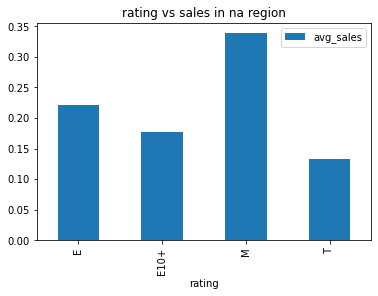

In [666]:
user_profile_na_rating.plot.bar(x='rating',y='avg_sales',title='rating vs sales in na region')
plt.show()

In [667]:
#create dataset with 'rating' and 'sales' in eu
user_profile_eu_rating=user_profile_eu.loc[user_profile_eu['rating']!='',['rating','eu_sales']].reset_index()

In [668]:
user_profile_eu_rating

,index,rating,eu_sales
0,42,M,6.31
1,77,E,6.12
2,92,M,3.48
3,94,E,5.75
4,105,M,3.27
...,...,...,...
1029,16645,M,0.01
1030,16652,E,0.01
1031,16660,M,0.00
1032,16672,M,0.00


In [669]:

user_profile_eu_rating=user_profile_eu_rating.groupby('rating').agg(avg_sales=('eu_sales','mean')).reset_index()

In [670]:
user_profile_eu_rating

,rating,avg_sales
0,E,0.254672
1,E10+,0.141077
2,M,0.330682
3,T,0.116987


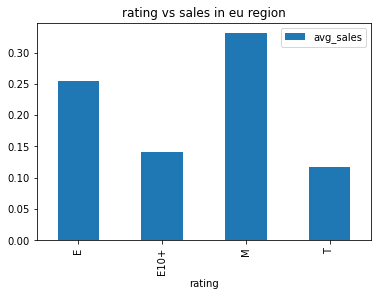

In [671]:
user_profile_eu_rating.plot.bar(x='rating',y='avg_sales',title='rating vs sales in eu region')
plt.show()

In [672]:
##create dataset with 'rating' and 'sales' in jp
user_profile_jp_rating=user_profile_jp.loc[user_profile_jp['rating']!='',['rating','jp_sales']].reset_index()

In [673]:
user_profile_jp_rating

,index,rating,jp_sales
0,42,M,0.38
1,77,E,0.06
2,92,M,0.14
3,94,E,0.08
4,105,M,0.24
...,...,...,...
1029,16645,M,0.00
1030,16652,E,0.00
1031,16660,M,0.00
1032,16672,M,0.00


In [674]:
user_profile_jp_rating=user_profile_jp_rating.groupby('rating').agg(avg_sales=('jp_sales','mean')).reset_index()

In [675]:
user_profile_jp_rating

,rating,avg_sales
0,E,0.039214
1,E10+,0.024462
2,M,0.027955
3,T,0.053907


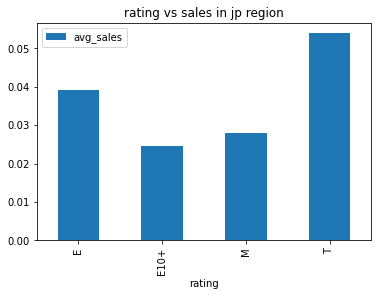

In [676]:
user_profile_jp_rating.plot.bar(x='rating',y='avg_sales',title='rating vs sales in jp region')
plt.show()

***ESRB ratings vs sales:Conclusion***
Average sales of games with M rating is highest in 'na' and 'eu' region where games with E rating doing well in 'jp' refion.All 3 regions have E,E10+ and M rated games doing well in the market.

[Back to Contents](#back)

<a id='hypothesis'></a>

# Test Hypothesis


#### Null hypothesis 1:Average user ratings of the Xbox One and PC platforms are the same.     Alternate hypothesis 1:Average user ratings of the Xbox One and PC platforms are different.

In order to test our hypothesis that the means of the two statistical populations are equal based on samples taken from them,we apply the 
two tailed hypothesis method scipy.stats.ttest_ind(array1, array2, equal_var)

We use critical statistical significance level alpha=0.05

In [677]:
#user rating of xboxone
xone_rating=games_data_recent.loc[(games_data_recent['platform'] == 'XOne') & (games_data_recent['user_score'] != ''),['user_score']]

In [678]:
xone_rating

,user_score
165,7.9
179,5.4
242,6.4
270,6.2
373,4.1
...,...
16630,8.2
16643,6.6
16645,7.7
16660,6.7


In [679]:
xone_rating['user_score'].unique()

array(['7.9', '5.4', '6.4', '6.2', '4.1', '5.5', '7.5', '4.4', '7.2',
       '3.1', '6.1', '8.2', '6.9', '6.3', '5.8', '6.6', '7.3', '8', '9.2',
       '7.8', '8.4', '5.9', '5.1', '5.2', '7.7', '7.4', '5.6', '7', '4',
       '6.7', '4.6', '8.5', '5.7', '6.8', '8.1', '6', '7.1', '3.2', '8.6',
       '4.3', '5.3', '8.3', '6.5', '8.7', '2.1', '7.6', '4.9', '8.9',
       '1.6', '4.2', '8.8'], dtype=object)

In [680]:
#user rating of PC
pc_rating=games_data_recent.loc[(games_data_recent['platform'] == 'PC') & (games_data_recent['user_score'] != ''),['user_score']]

In [681]:
pc_rating

,user_score
458,3.9
1530,5.4
1730,7.9
2303,5.7
2784,5.9
...,...
16456,8.3
16463,6.8
16509,7.9
16518,1.4


In [682]:
xone_rating['user_score']=pd.to_numeric(xone_rating['user_score'])

In [683]:
xone_rating['user_score'].unique()

array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 3.1, 6.1, 8.2, 6.9,
       6.3, 5.8, 6.6, 7.3, 8. , 9.2, 7.8, 8.4, 5.9, 5.1, 5.2, 7.7, 7.4,
       5.6, 7. , 4. , 6.7, 4.6, 8.5, 5.7, 6.8, 8.1, 6. , 7.1, 3.2, 8.6,
       4.3, 5.3, 8.3, 6.5, 8.7, 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8])

In [684]:
pc_rating['user_score']=pd.to_numeric(pc_rating['user_score'])

In [685]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis
print(alpha)
results = st.ttest_ind(xone_rating['user_score'], pc_rating['user_score'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

0.05
p-value:  0.0316476258527556
We reject the null hypothesis


p-value greate than 0.05 indicates that wwe can't reject the null hypothesis.
So it proves the hypothesis 'Average user ratings of the Xbox One and PC platforms are the same. '

#### Null hypothesis 2:Average user ratings of the Action and Sports genre are the same. Alternate hypothesis 2:Average user ratings of the Action and Sports genre are different. 

In [686]:
#user rating of action genre
action_rating=games_data_recent.loc[games_data_recent['genre'] == 'Action',['user_score']]

In [687]:
action_rating

,user_score
42,8.3
165,7.9
225,9.1
231,8.1
295,6.3
...,...
16680,
16691,
16692,7.6
16699,


In [688]:
action_rating=action_rating[action_rating['user_score']!=''].reset_index()

In [689]:
action_rating

,index,user_score
0,42,8.3
1,165,7.9
2,225,9.1
3,231,8.1
4,295,6.3
...,...,...
342,16645,7.7
343,16652,8.5
344,16660,6.7
345,16672,7.8


In [690]:
action_rating['user_score']=pd.to_numeric(action_rating['user_score'])

In [691]:
action_rating['user_score'].unique()

array([8.3, 7.9, 9.1, 8.1, 6.3, 4.9, 7.6, 4.1, 8.2, 6.8, 8.6, 9. , 6.5,
       5.1, 7.3, 4.5, 5.8, 6.6, 8.5, 8. , 6.1, 7.8, 7.5, 7.2, 6.2, 5. ,
       8.4, 7.1, 8.7, 7. , 6.4, 7.4, 6.7, 5.4, 7.7, 4.6, 5.9, 3.4, 3. ,
       6.9, 3.7, 5.6, 4.7, 4.2, 5.7, 3.6, 3.3, 5.3, 4.3, 5.5, 3.2, 8.8,
       4.8, 2.5, 6. , 3.5, 3.8, 5.2, 2.8, 2.4, 2. , 3.1, 2.3])

In [692]:
#user rating of action genre
sports_rating=games_data_recent.loc[games_data_recent['genre'] == 'Sports',['user_score']].reset_index()

In [693]:
sports_rating

,index,user_score
0,77,4.3
1,94,5
2,143,5.7
3,264,4.5
4,314,6.7
...,...,...
156,16241,5.5
157,16428,
158,16518,1.4
159,16638,5.1


In [694]:
sports_rating=sports_rating[sports_rating['user_score']!='']

In [695]:
sports_rating

,index,user_score
0,77,4.3
1,94,5
2,143,5.7
3,264,4.5
4,314,6.7
...,...,...
155,16146,6.9
156,16241,5.5
158,16518,1.4
159,16638,5.1


In [696]:
sports_rating['user_score']=pd.to_numeric(sports_rating['user_score'])

In [697]:
sports_rating['user_score'].unique()

array([4.3, 5. , 5.7, 4.5, 6.7, 4.4, 5.9, 4.2, 3.2, 5.5, 7. , 6.1, 6.2,
       5.4, 4.9, 6.3, 3. , 2.9, 6.4, 2.7, 3.5, 7.4, 5.1, 7.8, 7.1, 3.1,
       7.2, 4.6, 3.3, 7.7, 4. , 6.9, 3.6, 6. , 8.2, 2.4, 2.8, 7.6, 5.3,
       6.8, 1.7, 8.7, 1.6, 5.8, 6.6, 8.3, 5.6, 1.5, 0.7, 3.8, 7.3, 4.1,
       2. , 2.1, 3.4, 0.2, 4.8, 1.9, 6.5, 8. , 3.7, 8.8, 1.4])

In [698]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sports_rating['user_score'],action_rating['user_score'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  3.168846040977053e-24
We reject the null hypothesis


p-value lesser than alpha shows that we reject the null hypothesis.  
It means the average user ratings for the Action and Sports genres are different.

<a id='end'></a>

# Conclusion

1.Leading platform : PS4,Xone,3DS  
2.Shrinking platform :PS3,X360,Wii  
   PS4 seems to be a profitable platform.Though its is in declining phase , it has been growing for the past 4-5 years consistently . So there is a possibility that this declining phase is a temporary one.
XOne is also showing a similar trend. 
WiiU has shown consistency with lesser deviation for the last 4 years .So though it is showing decrease in sales , it has potential to improve in sales.  
3.PS4 has the highest average sales compared to all other platform for the years from 2011-2016.
   PS2 which was popular in 2000s is totally out of picture from 2011..
   PS4 along with X360,PS3,Xone are the ones with highest ranking for average sales in the given time period.  
   PSP,PS2 and PSV have very low range in average sales for the given period.
4.'user_score' negatively impacts the total sales whereas 'critic_score' has medium positive correlation with 'total_values'.  
5.Number of games released in Action genre is much more compared to any other genre.'Action' genre is more profitable compared to any other genre.  
6.Analysing each region's top 5 platform shows that 'na' and 'eu' has the same set of top 5 platforms ('PS3', 'PS4', 'X360', '3DS', 'Wii')whereas Japan got few different ones . Also na region seems to contribute more to the overall market as its share is around 42% , whereas eu region contributes around 34% and jp region contributes around 19%.  
7.Analysing top 5 genre for each region , we conclude that all 3 regions have 'Action','Roleplaying' and 'Racing'in their top 5 genre.The other two being totally different in each region.  
8.Average sales of games with M rating is highest in 'na' and 'eu' region where games with E rating doing well in 'jp' region.All 3 regions have E,E10+ and M rated games doing well in the market.

Based on the detailed analysis we see that game in 'Shooter ','Action'   genre with E or M rating for PS4 platform seems to
be a potential winner in 2017 based on the data from 2011-2016.


[Back to Contents](#back)